# Exercise 5: 

As seen in exercise 3 of this week, we can write the background scalar field equation as:
$$
\ddot{\Phi}+3H\dot{\Phi}+V'\left(\Phi\right)=0
$$
where $\Phi$ rapresents the scalr field, $V'\left(\Phi\right)=\frac{\partial V}{\partial \Phi}$ and the expression is written in cosmic time.

The other equation that regulates the evolution of H in time is given by Baumann'article on inflation (Appendix B1, pag.143) and state:
$$
H^2=\frac{1}{3}\left(\frac{1}{2}\dot{\Phi}^2+V\left(\Phi\right)\right)
$$

With the proposed potential, we then have:
$$
\ddot{\Phi}+3H\dot{\Phi}+m\Phi=0\\
H^2=\frac{1}{6}\left(\dot{\Phi}^2+m\Phi^2\right)
$$


In [13]:
# Useful imports
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [14]:
# Defining useful parameters

m = 0.1 # in Plank's Mass
phi0 = 5.0
phi_dot0 = 1.0

In [15]:

# Defining the function that must be solved with its costraint (it rapresents the ODE)

def evolution(phi, phi_dot, t):
    # Computing the constraint at a given time value
    H = np.sqrt( (phi_dot**2 + m*phi**2) / 6 )
    # Computing the differential equation
    phi_dot_dot = -3 * H * phi_dot - m * phi

    return phi_dot_dot

In [16]:
def rk4_step(func, y, t, dt):
    """
    Runge-Kutta's 4th order Method for a single step.
    
    :param func: function that defines the ODE.
    :param y: current value of the dependent variable.
    :param t: current time.
    :param dt: length of the time spacing.
    :return: dependent variable upgraded after a step.
    """
    k1 = dt * func(y, t)
    k2 = dt * func(y + 0.5 * k1, t + 0.5 * dt)
    k3 = dt * func(y + 0.5 * k2, t + 0.5 * dt)
    k4 = dt * func(y + k3, t + dt)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

def solve_rk4(func, y0, t0, tf, dt):
    """
    Numerically solving an ODE using RK4.
    
    :param func: function that defines the ODE.
    :param y0: starting value of the depending variable.
    :param t0: starting time.
    :param tf: ending time.
    :param dt: length of the time spacing.
    :return: a numpy ND array containing the values of the function and its (N-1) derivatives.
    """
    num_steps = int((tf - t0) / dt)
    t = t0
    y = y0
    solution = [y0]
    
    for i in range(num_steps):
        y = rk4_step(func, y, t, dt)
        t += dt
        solution.append(y)
        
    return np.array(solution)

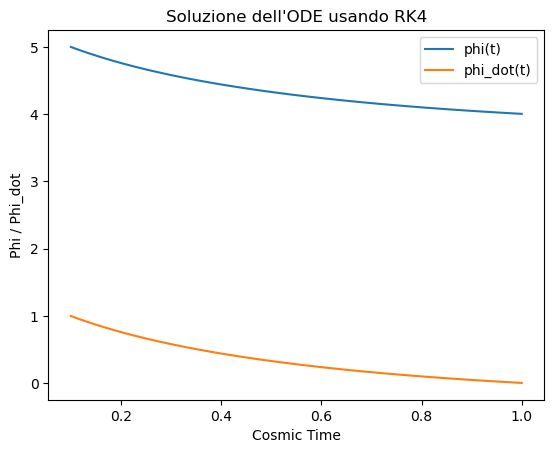

In [17]:
# Time interval in Plank'interval
t0 = 0.1
tf = 1.0
dt = 0.01

# Risolution of the differential eqaution using RK4
solution = solve_rk4(lambda y, t: evolution(y[0], y[1], t), [phi0, phi_dot0], t0, tf, dt)


# Result plot
plt.plot(np.arange(t0, tf + dt, dt), solution[:, 0], label='phi(t)')
plt.plot(np.arange(t0, tf + dt, dt), solution[:, 1], label='phi_dot(t)')
plt.xlabel('Cosmic Time')
plt.ylabel('Phi / Phi_dot')
plt.title('Soluzione dell\'ODE usando RK4')
plt.legend(loc='best')
plt.grid(False)
plt.show()

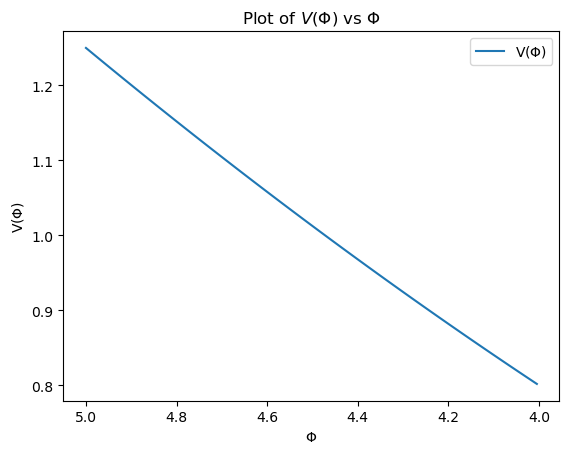

In [18]:
# Compute V(phi)
V = m * solution[:, 0]**2 / 2

# Plot V(phi) vs phi
plt.plot(solution[:, 0], V, label='V($\Phi$)')
plt.xlabel('$\Phi$')
plt.ylabel('V($\Phi$)')
plt.title('Plot of $V(\Phi)$ vs $\Phi$')
plt.legend()
# Reverse the x-axis
plt.gca().invert_xaxis()
plt.grid(False)
plt.show()


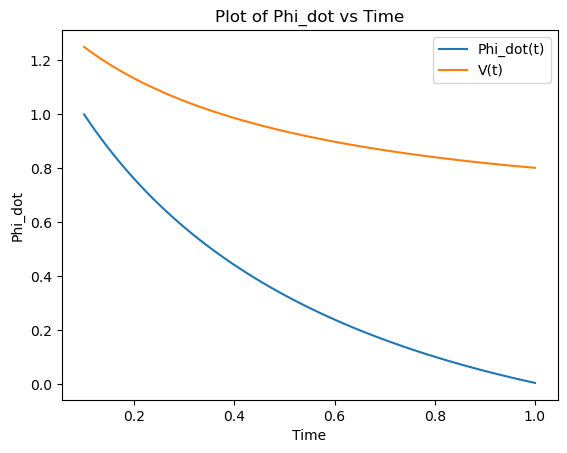

In [19]:
# Compute Phi_dot
phi_dot = solution[:, 1]


# Plot Phi_dot vs time
plt.plot(np.arange(t0, tf + dt, dt), phi_dot, label='Phi_dot(t)')
plt.plot(np.arange(t0, tf + dt, dt), V, label='V(t)')
plt.xlabel('Time')
plt.ylabel('Phi_dot')
plt.title('Plot of Phi_dot vs Time')
plt.legend(loc='best')
plt.grid(False)
plt.show()

